# A pretrained network which recognises the subject of an image

The pretrained network we will explore here was trained on a subset of the ImageNet dataset which is a very large dataset of over 14 million images maintained by Stanford University. All of the images are labeled with a hierachy of nouns that come from the WordNet dataset.

First, we can take a look at all of the predefined models in torchvision

In [215]:
from torchvision import models

In [216]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

Using the resnet101 function, we will now instantiate a 101-layer convolutional neural network.

In [217]:
resnet = models.resnet101(pretrained = True)

In [218]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

The `resnet` variable can be called like a function, taking as input one or more images and producing an equal number of scores for each of the 1,000 ImageNet classes. Before we can do that, however, we have to preprocess the input images so they are the right size and so that their value (colors) sit roughly in the same numerical range. In order to accomplish that, the torchvision module provides transforms, which allow us to quickly define pipelines of basic preprocessing functions

In [219]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.225]
    )
])

In this case, we defined a preprocess function that will scale the input image to 256 x 256, crop the image to 224 x 224 around the center, transform it into a tensor and normalize its RGB components so that they have defined means and standard deviations.

We can now grab an image of our choice, preprocess it and see what resnet thinks of it.

In [220]:
from PIL import Image
img = Image.open('car.png')

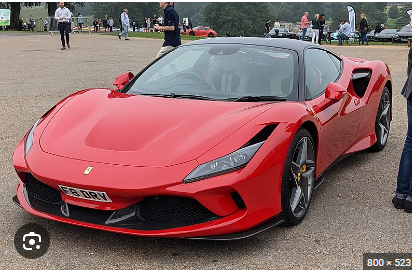

In [221]:
img

Next, we can pass the image through our preprocessing pipeline

In [222]:
img_t = preprocess(img)

We can then reshape, crop, and normalize the input tensor in a way that the network expects

In [223]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

In order for our model to do inference, we need to put the network in eval mode.

In [224]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Now that eval has been set, we are ready for inference.

In [225]:
out = resnet(batch_t)
out

tensor([[-4.8862e-01, -2.7627e+00, -1.0804e+00, -1.9107e+00, -2.5016e+00,
         -6.5112e-01, -1.6524e+00,  1.6753e+00,  1.2621e+00,  1.6896e+00,
         -3.3070e+00, -3.7675e-01, -1.3921e+00, -1.1813e+00, -3.2523e+00,
         -1.4097e+00, -7.7691e-01, -7.8205e-02,  7.4633e-02, -2.4521e+00,
         -2.0973e+00, -3.4996e-01, -2.8173e+00,  1.6476e+00, -2.4174e+00,
         -3.0446e+00, -3.5425e+00, -2.3439e+00, -7.6037e-01, -4.0980e+00,
         -3.4639e+00, -2.4001e+00, -2.1646e+00, -7.4417e-02,  9.7933e-01,
         -4.0392e-01, -1.2862e+00, -7.6058e-01, -2.0729e+00, -2.3126e+00,
         -5.2989e-01, -7.6690e-01, -1.6474e+00, -2.1322e+00, -2.1921e+00,
         -2.1637e+00, -1.5878e+00, -3.6449e+00, -1.8945e+00, -1.7733e+00,
         -1.5135e+00,  6.2327e-02,  1.7649e+00,  1.7040e-01,  2.1380e-03,
         -1.9635e-01,  1.2088e-01, -5.4931e-01, -7.1853e-01,  2.3217e+00,
          3.2955e+00, -1.6973e+00, -4.5350e-01,  1.9618e+00,  7.8737e-02,
         -1.0816e+00,  1.0199e+00,  4.

To see the list of predicted labels, we will load a text file listing the labels in the same order they were presented to the network duiring training, and then we will pick out the label at the index that produced the highest score from the network.

In [226]:
with open('imagenet_classes.txt') as f:
  labels = [line.strip() for line in f.readlines()]

At this point, we need to determine the index corresponding to the maximum score
in the out tensor we obtained previously. We can do that using the max function in
PyTorch, which outputs the maximum value in a tensor as well as the indices where
that maximum value occurred

In [227]:
_, index = torch.max(out,1)

We can now use the index to access the label. Here, index is not a plain Python number, but a one-element, one-dimensional tensor (specifically, tensor([207])), so we
need to get the actual numerical value to use as an index into our labels list using
index[0]. We also use torch.nn.functional.softmax (http://mng.bz/BYnq) to normalize our outputs to the range [0, 1], and divide by the sum. That gives us something
roughly akin to the confidence that the model has in its prediction. In this case, the
model is 96% certain that it knows what it’s looking at is a golden retriever:

In [228]:
percentage = torch.nn.functional.softmax(out, dim=1)[0]*100
labels[index[0]], percentage[index[0]].item()

('sports car, sport car', 98.68788146972656)

 Since the model produced scores, we can also find out what the second best, third
best, and so on were. To do this, we can use the sort function, which sorts the values
in ascending or descending order and also provides the indices of the sorted values in
the original array:

In [229]:
_, indices = torch.sort(out, descending = True)
[(labels[idx], percentage[idx].item())for idx in indices[0][:5]]

[('sports car, sport car', 98.68788146972656),
 ('racer, race car, racing car', 0.6422728896141052),
 ('car wheel', 0.4682006239891052),
 ('convertible', 0.11457161605358124),
 ('grille, radiator grille', 0.05800938233733177)]